# Load Data and Initial Inspection

In [4]:
import pandas as pd

data = pd.read_csv("/Users/harshit/Downloads/final_adjusted_crowd_dataset 1-1.csv")

# Display first few rows to understand the structure
data.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


# Check for Missing Values, Duplicates, and Data Types

In [24]:
# Identify columns with missing values
missing_values_count = data.isnull().sum()
print("Missing values per column:\n", missing_values_count)

# Count the number of duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# Display data types to verify compatibility
print("\nColumn Data Types:\n", data.dtypes)



Missing values per column:
 Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0
label        0
dtype: int64
Total duplicate rows: 0

Column Data Types:
 Longitude           float64
Latitude            float64
Speed               float64
Distance            float64
Time         datetime64[ns]
Acc X               float64
Acc Y               float64
Acc Z               float64
Heading             float64
gyro_x              float64
gyro_y              float64
gyro_z              float64
label                 int64
dtype: object


# Identifying Noise and Planning Smoothing Techniques

In [26]:
import numpy as np

# Specify the sensor-related columns
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Generate summary statistics for the sensor data
sensor_summary = data[sensor_columns].describe()
print("\nSensor Data Summary Statistics:\n", sensor_summary)



Sensor Data Summary Statistics:
               Acc X         Acc Y         Acc Z        gyro_x        gyro_y  \
count  14249.000000  14249.000000  14249.000000  14249.000000  14249.000000   
mean      -0.001127      0.180203     -0.023606     -0.001318     -0.006522   
std        0.599860      0.480099      0.979101      0.085925      0.073686   
min       -4.580816     -3.478387     -7.530997     -0.579854     -0.493131   
25%       -0.200506      0.002901     -0.361070     -0.027754     -0.022154   
50%        0.010181      0.169017     -0.009412     -0.001486     -0.005172   
75%        0.189355      0.342528      0.334698      0.025392      0.010711   
max        4.940733      3.103188      7.982552      0.660203      0.525426   

             gyro_z  
count  14249.000000  
mean      -0.003201  
std        0.038870  
min       -0.292319  
25%       -0.016208  
50%       -0.002525  
75%        0.011647  
max        0.300464  


# Implement Smoothing Using Rolling Mean

In [28]:
# Apply a rolling window with a size of 5 to smooth sensor readings
data[sensor_columns] = data[sensor_columns].rolling(window=5, min_periods=1).mean()

# Display the first 10 rows of the smoothed sensor data
data[sensor_columns].head(10)



,Acc X,Acc Y,Acc Z,gyro_x,gyro_y,gyro_z
0,0.046402,-0.137178,-0.282934,-0.036306,-0.008226,-0.023416
1,0.000557,-0.011573,-0.184978,-0.018285,-0.008532,-0.015170
2,-0.014732,0.006143,-0.202100,-0.013568,-0.010738,-0.011267
3,-0.004414,0.016950,-0.217789,-0.012075,-0.010721,-0.009418
4,-0.008494,0.021930,-0.236372,-0.010421,-0.010149,-0.007892
5,-0.021296,0.063228,-0.231738,-0.003604,-0.009611,-0.002639
6,-0.012536,0.044037,-0.290319,-0.003726,-0.008585,-0.000415
7,0.005596,0.041277,-0.319114,-0.002586,-0.005050,0.000945
8,-0.010389,0.049406,-0.308172,-0.000143,-0.002509,0.001995
9,-0.003706,0.073216,-0.278818,0.000102,-0.000358,0.002460


# Time-Series Visualization of Sensor Data

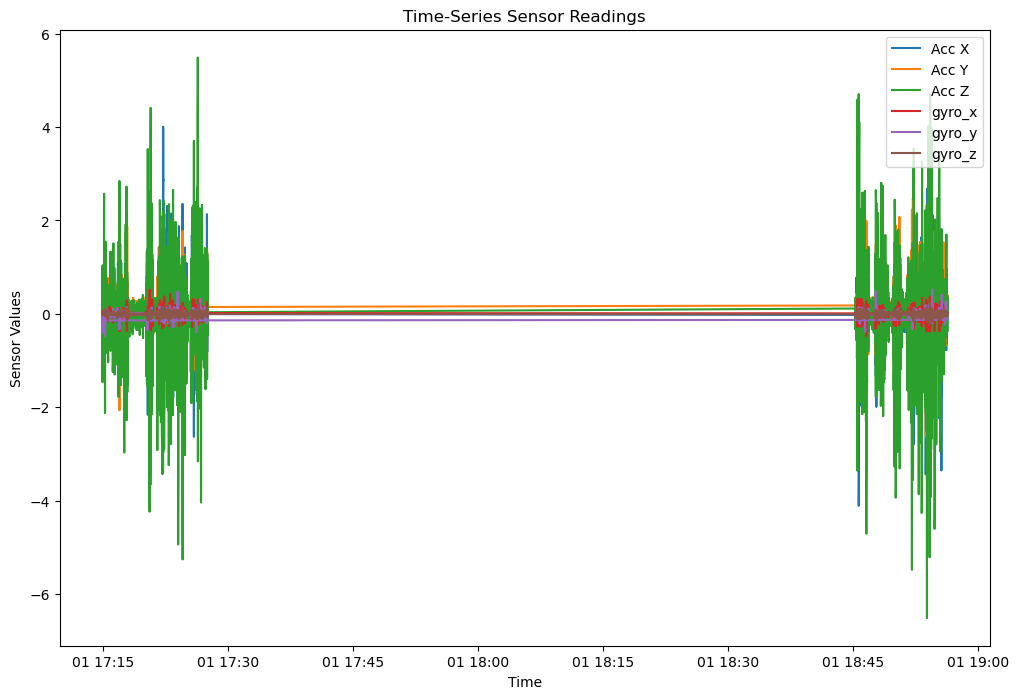

In [30]:
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime format, assuming 'Time' is in 'HH-MM-SS' format
data['Time'] = pd.to_datetime(data['Time'], format='%H-%M-%S')

# Plot time-series data for each sensor reading
plt.figure(figsize=(12, 8))

for sensor in sensor_columns:
    plt.plot(data['Time'], data[sensor], label=sensor)

plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.title('Time-Series Sensor Readings')
plt.legend(loc='upper right')
plt.show()



# Summarize Outlier Counts for Each Sensor

In [40]:
# Define the sensor columns
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Dictionary to store IQR, Q1, and Q3 for each sensor
iqr_info = {}

for col in sensor_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_info[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
    
# Display IQR, Q1, and Q3 values for each sensor
print("IQR, Q1, and Q3 values for each sensor:\n", iqr_info)

IQR, Q1, and Q3 values for each sensor:
 {'Acc X': {'Q1': -0.17104459080000048, 'Q3': 0.15325731199999953, 'IQR': 0.32430190280000004}, 'Acc Y': {'Q1': 0.03428502128000012, 'Q3': 0.3183814110400015, 'IQR': 0.2840963897600014}, 'Acc Z': {'Q1': -0.3007930883999988, 'Q3': 0.28477748000000036, 'IQR': 0.5855705683999992}, 'gyro_x': {'Q1': -0.02342878264000011, 'Q3': 0.020846793639999767, 'IQR': 0.04427557627999988}, 'gyro_y': {'Q1': -0.02059430508000012, 'Q3': 0.008877919519999913, 'IQR': 0.029472224600000034}, 'gyro_z': {'Q1': -0.014005116280000063, 'Q3': 0.009350330039999962, 'IQR': 0.023355446320000025}}


In [43]:
# Create a DataFrame to store outlier flags for each sensor
outliers = pd.DataFrame(index=data.index)

for col in sensor_columns:
    Q1 = iqr_info[col]['Q1']
    Q3 = iqr_info[col]['Q3']
    IQR = iqr_info[col]['IQR']
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flag as outlier (1) if value is outside bounds, otherwise 0
    outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).astype(int)

# Display the first few rows of the outliers DataFrame
outliers.head()


,Acc X,Acc Y,Acc Z,gyro_x,gyro_y,gyro_z
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


# Outlier Counts for Each Sensor

In [50]:
# Count total outliers for each sensor
outlier_counts = outliers.sum()
print("Number of outliers detected for each sensor:\n", outlier_counts)

Number of outliers detected for each sensor:
 Acc X     2075
Acc Y     1690
Acc Z     1723
gyro_x    2200
gyro_y    2578
gyro_z    1866
dtype: int64


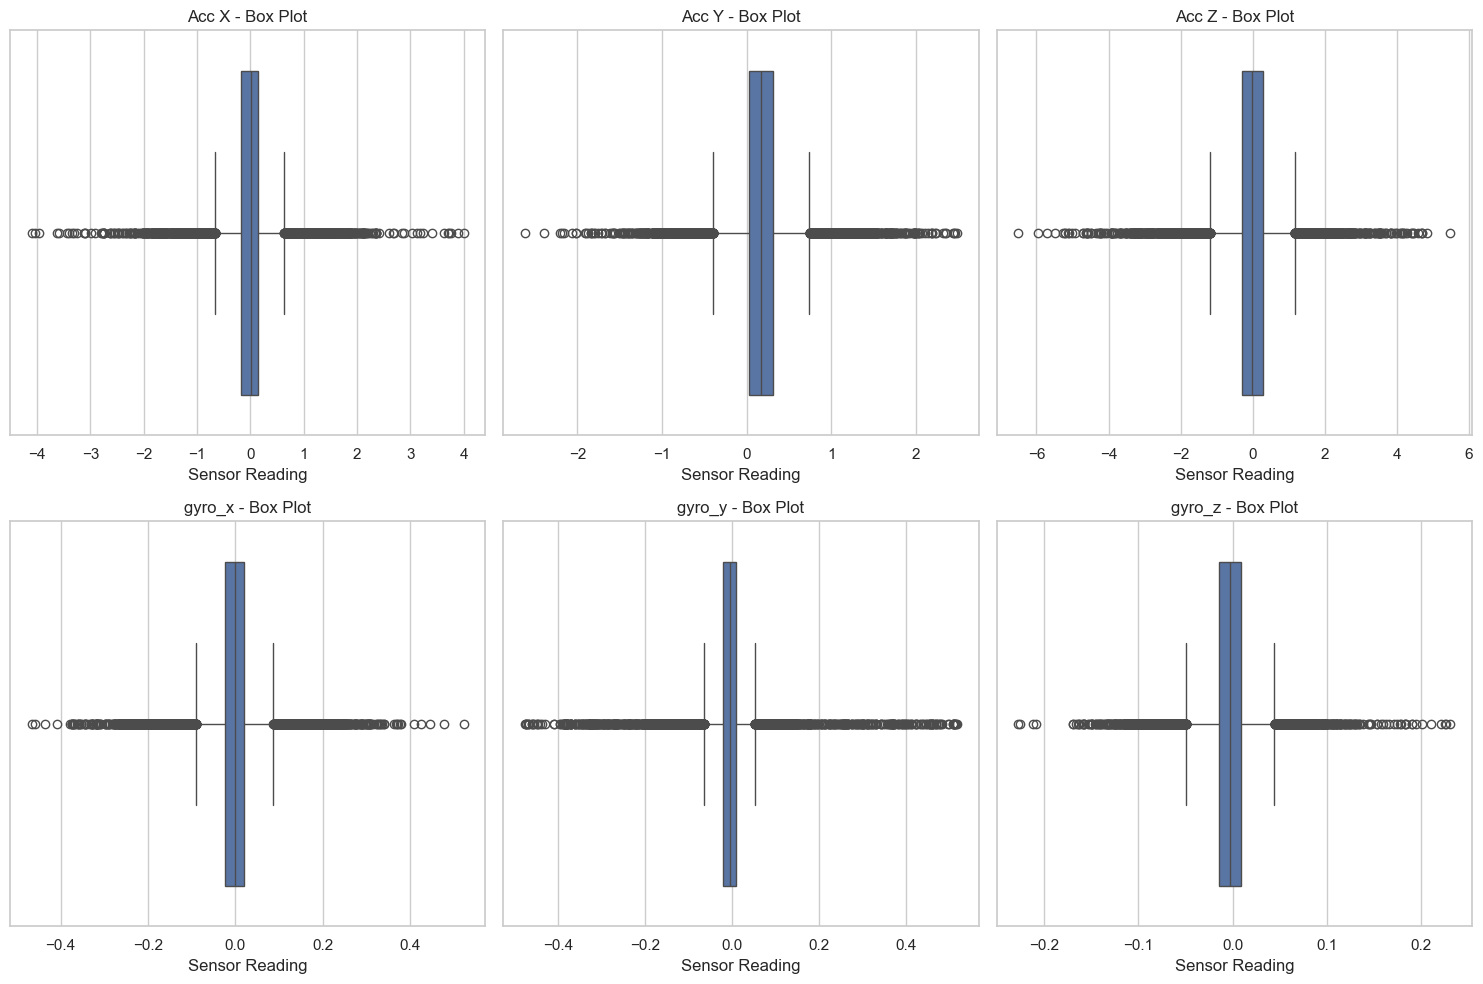

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot a box plot for each sensor column
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid for 6 sensors
    sns.boxplot(x=data[col])
    plt.title(f"{col} - Box Plot")
    plt.xlabel("Sensor Reading")
    
plt.tight_layout()
plt.show()

# Analysis of Outliers

In [58]:
# Calculate and print the percentage of outliers for each sensor
outlier_summary = {col: (outliers[col].sum() / len(outliers) * 100) for col in sensor_columns}

# Display the percentage of outliers for each sensor
for col, percentage in outlier_summary.items():
    print(f"{col}: {percentage:.2f}% of readings are outliers.")

Acc X: 14.56% of readings are outliers.
Acc Y: 11.86% of readings are outliers.
Acc Z: 12.09% of readings are outliers.
gyro_x: 15.44% of readings are outliers.
gyro_y: 18.09% of readings are outliers.
gyro_z: 13.10% of readings are outliers.


# Calculate IQR and Fine-Tune Thresholds Using Tukey’s Method

In [64]:
# Task-3: Define a more robust IQR multiplier (e.g., 2.5 for Tukey's method)
iqr_multiplier = 2.5
iqr_info = {}  # Dictionary to store Q1, Q3, and IQR values for each sensor
refined_outliers = pd.DataFrame(index=data.index)  # DataFrame to hold refined outliers

# Calculate refined bounds for each sensor column
for col in sensor_columns:
    Q1 = data[col].quantile(0.25)  # Calculate the first quartile
    Q3 = data[col].quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1  # Compute the interquartile range
    iqr_info[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}  # Store quartile information
    
    # Define refined bounds using Tukey's method
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # Identify outliers based on refined bounds
    refined_outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).astype(int)

# Display IQR, Q1, and Q3 values for each sensor
for sensor, values in iqr_info.items():
    print(f"{sensor}: Q1 = {values['Q1']}, Q3 = {values['Q3']}, IQR = {values['IQR']}")


Acc X: Q1 = -0.17104459080000048, Q3 = 0.15325731199999953, IQR = 0.32430190280000004
Acc Y: Q1 = 0.03428502128000012, Q3 = 0.3183814110400015, IQR = 0.2840963897600014
Acc Z: Q1 = -0.3007930883999988, Q3 = 0.28477748000000036, IQR = 0.5855705683999992
gyro_x: Q1 = -0.02342878264000011, Q3 = 0.020846793639999767, IQR = 0.04427557627999988
gyro_y: Q1 = -0.02059430508000012, Q3 = 0.008877919519999913, IQR = 0.029472224600000034
gyro_z: Q1 = -0.014005116280000063, Q3 = 0.009350330039999962, IQR = 0.023355446320000025


# Calculate and Compare Outlier Counts

In [69]:
# Calculate the percentage of outliers for each sensor using refined IQR
refined_outlier_summary = {col: (refined_outliers[col].sum() / len(refined_outliers) * 100) for col in sensor_columns}

# Display the outlier summary for refined IQR
print("\nRefined IQR Outlier Summary (using multiplier of 2.5):")
for col, percentage in refined_outlier_summary.items():
    print(f"{col}: {percentage:.2f}% of readings are outliers.")


Refined IQR Outlier Summary (using multiplier of 2.5):
Acc X: 7.00% of readings are outliers.
Acc Y: 5.30% of readings are outliers.
Acc Z: 5.66% of readings are outliers.
gyro_x: 7.93% of readings are outliers.
gyro_y: 10.11% of readings are outliers.
gyro_z: 5.26% of readings are outliers.


# Visualize Outliers with Box Plots

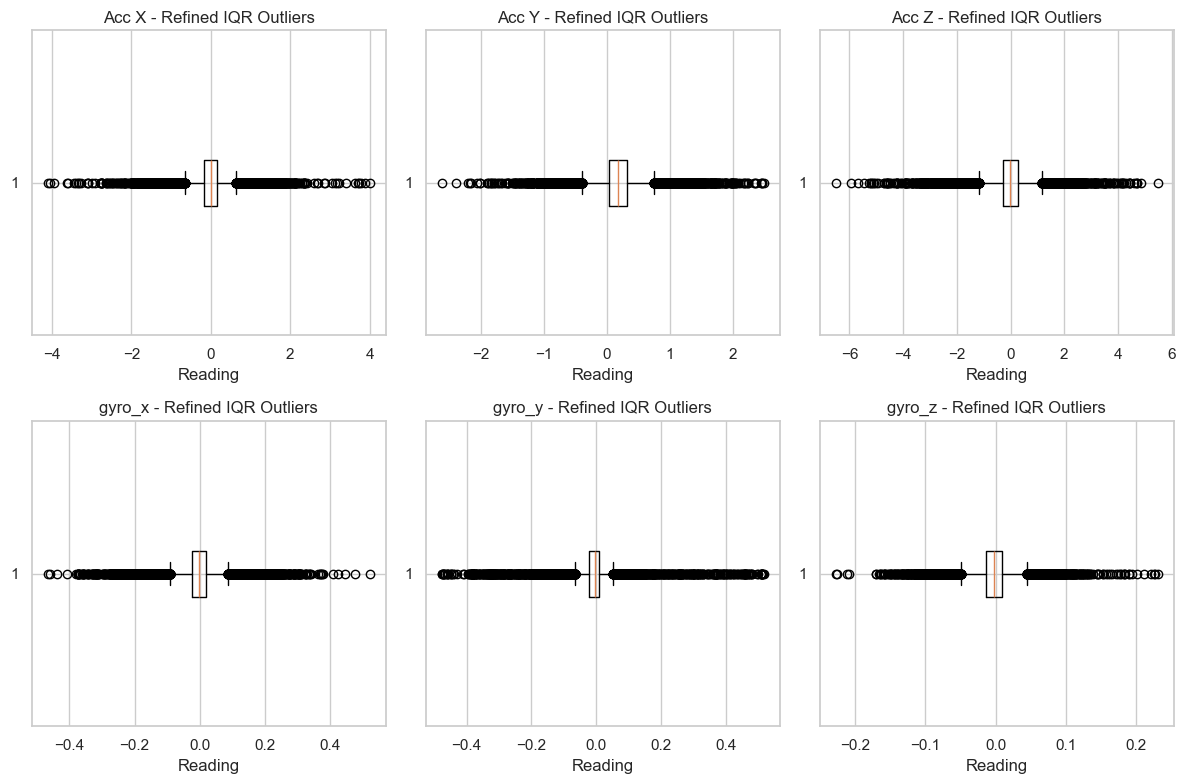

In [73]:
# Set up box plots for each sensor column to visualize refined outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[col], vert=False, showfliers=True)
    plt.title(f'{col} - Refined IQR Outliers')
    plt.xlabel('Reading')

plt.tight_layout()
plt.show()

# Implement Isolation Forest with Basic Parameters

In [91]:
import pandas as pd
from sklearn.ensemble import IsolationForest  # Import IsolationForest from sklearn

# Assuming 'data' is your DataFrame containing sensor data
# Define the sensor columns for the Isolation Forest model
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Initialize the Isolation Forest model with specified parameters
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the sensor data using the specified columns
isolation_forest.fit(data[sensor_columns])

# Predict anomalies using the same set of columns
data['IsolationForest_Anomaly'] = isolation_forest.predict(data[sensor_columns])

# Convert the predictions to a binary format: 1 = anomaly, 0 = normal
data['IsolationForest_Anomaly'] = data['IsolationForest_Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Display the total number of anomalies detected
print("Total anomalies detected by Isolation Forest:", data['IsolationForest_Anomaly'].sum())


Total anomalies detected by Isolation Forest: 713


   Contamination Rate  Number of Estimators  Number of Anomalies Detected
0                0.01                    50                           143
1                0.01                   100                           143
2                0.01                   200                           143
3                0.05                    50                           713
4                0.05                   100                           713
5                0.05                   200                           713
6                0.10                    50                          1425
7                0.10                   100                          1425
8                0.10                   200                          1425


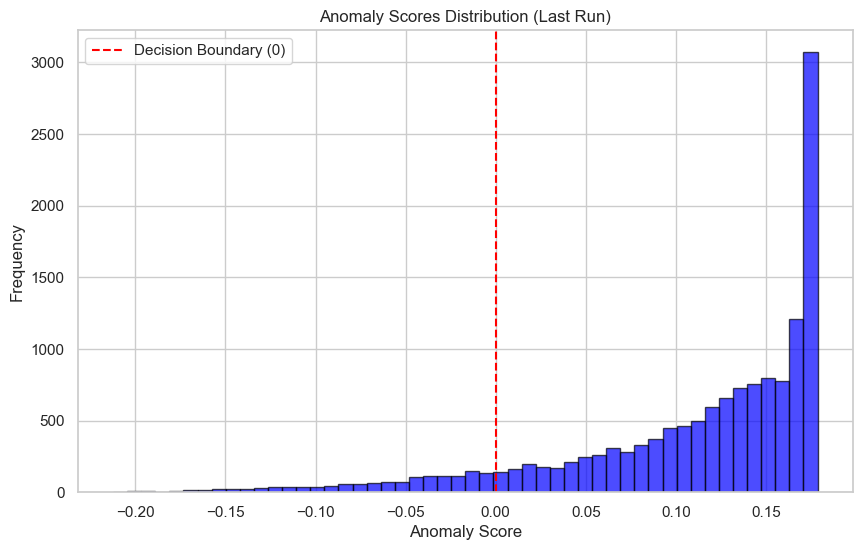

In [96]:
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[sensor_columns]

# Function to run Isolation Forest with different hyperparameters
def run_isolation_forest(X, contamination, n_estimators):
    model = IsolationForest(contamination=contamination, n_estimators=n_estimators, random_state=42)
    model.fit(X)
    anomalies = model.predict(X)
    return (anomalies, model.decision_function(X))

# Test different contamination rates and number of estimators
contamination_rates = [0.01, 0.05, 0.1]
n_estimators_list = [50, 100, 200]

# Store results for analysis
results = []

# Run Isolation Forest with different parameters
for contamination in contamination_rates:
    for n_estimators in n_estimators_list:
        anomalies, anomaly_scores = run_isolation_forest(X, contamination, n_estimators)
        num_anomalies = np.sum(anomalies == -1)
        results.append({
            'Contamination Rate': contamination,
            'Number of Estimators': n_estimators,
            'Number of Anomalies Detected': num_anomalies
        })
# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Visualize anomaly scores for the last set of parameters used
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Anomaly Scores Distribution (Last Run)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.legend()
plt.show()

In [100]:
# Define function to apply Isolation Forest with different contamination rates and estimator values
def isolation_forest_with_params(data, contamination_rates, estimator_counts):
    results = []  # Store results for each parameter combination
    for contamination in contamination_rates:
        for n_estimators in estimator_counts:
            # Initialize and fit Isolation Forest
            iso_forest = IsolationForest(contamination=contamination, n_estimators=n_estimators, random_state=42)
            data['anomaly_score'] = iso_forest.fit_predict(data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']])
            
            # Count anomalies
            num_anomalies = (data['anomaly_score'] == -1).sum()
            results.append({'Contamination Rate': contamination, 'Number of Estimators': n_estimators, 'Number of Anomalies Detected': num_anomalies})
            
            # Plot anomaly scores over time
            plt.figure(figsize=(10, 4))
            plt.plot(data.index, iso_forest.decision_function(data[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']]), label=f'Contamination={contamination}, Estimators={n_estimators}')
            plt.xlabel('Time')
            plt.ylabel('Anomaly Score')
            plt.title(f'Isolation Forest Anomaly Scores Over Time\nContamination={contamination}, Estimators={n_estimators}')
            plt.legend()
            plt.show()
    
    return pd.DataFrame(results)

# Define the parameters to test
contamination_rates = [0.01, 0.05, 0.1]
estimator_counts = [50, 100, 200]

# Run the Isolation Forest Model with Different Hyperparameters and Display Results

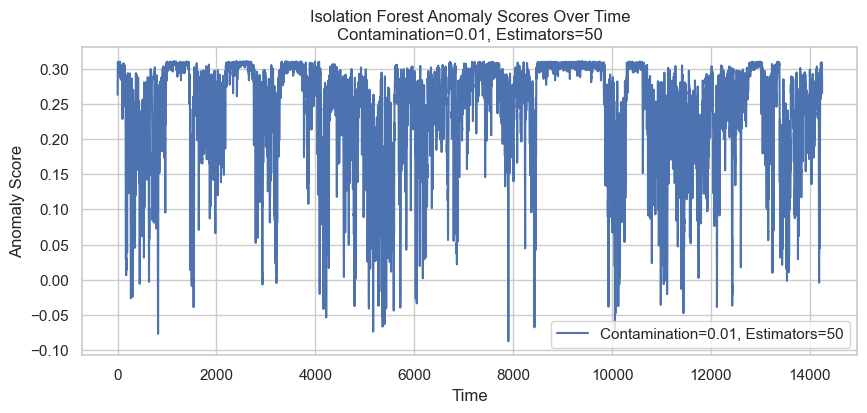

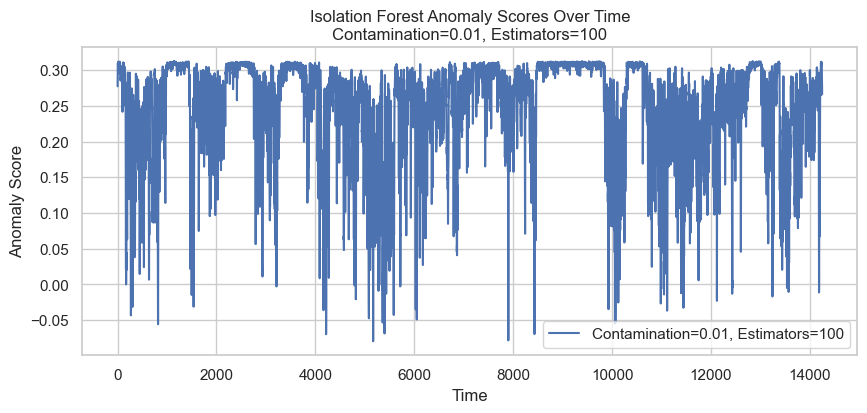

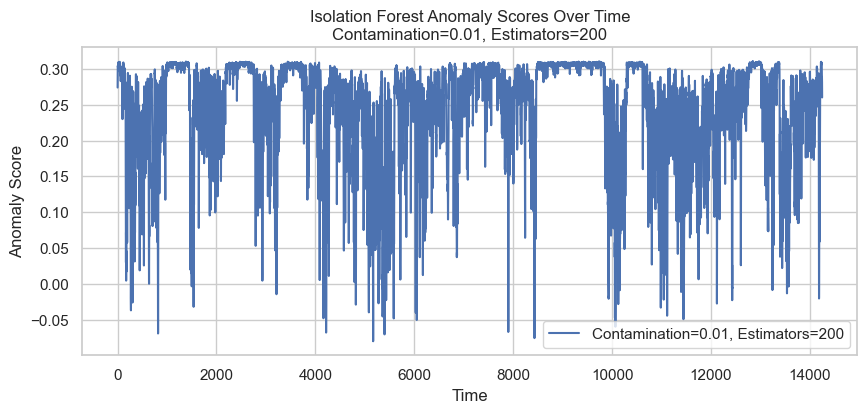

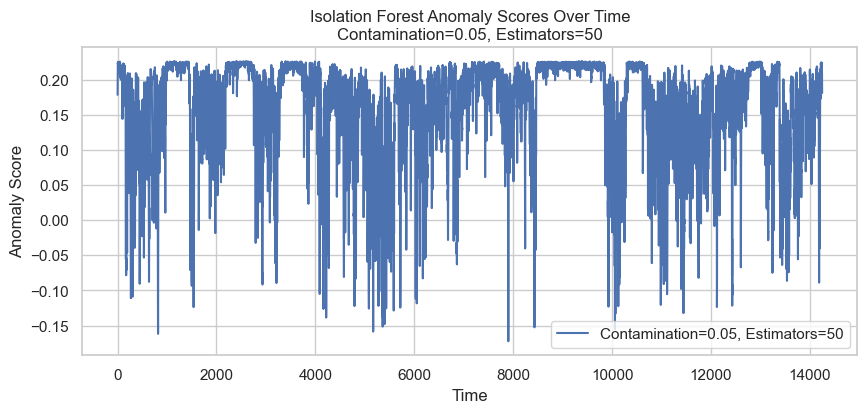

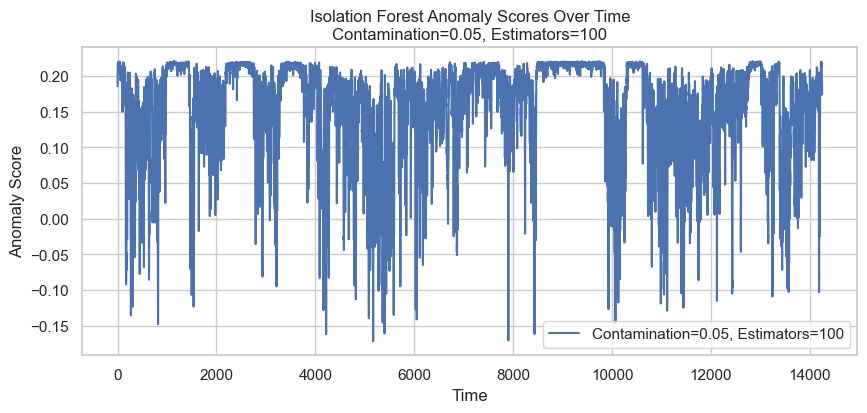

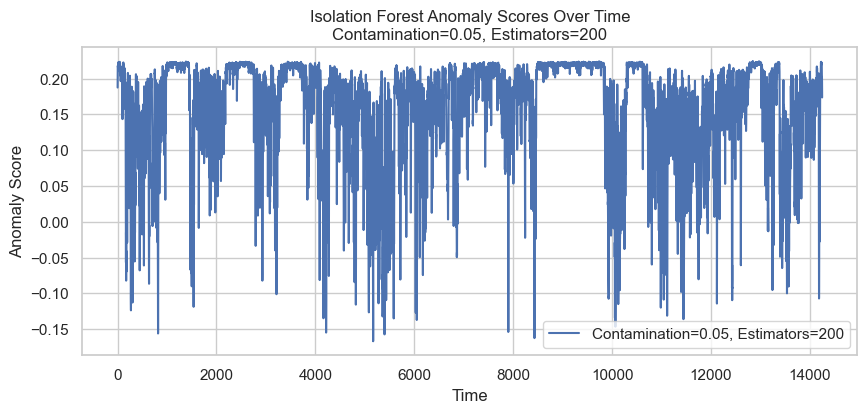

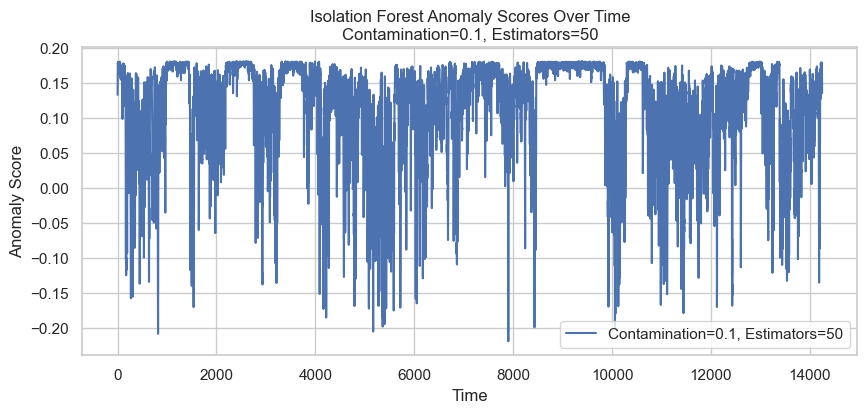

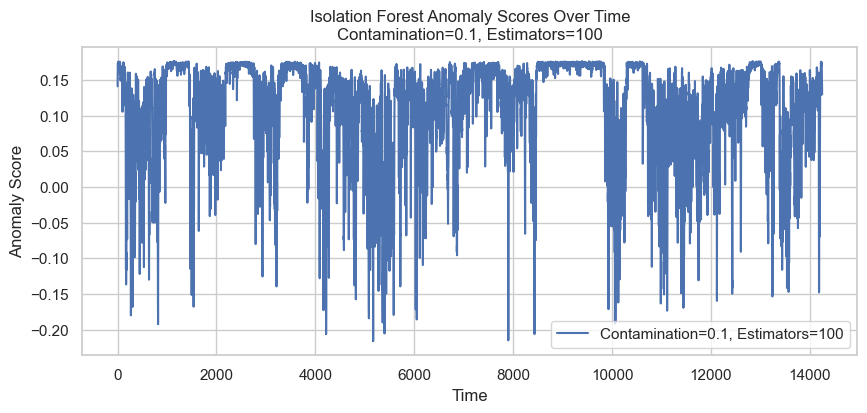

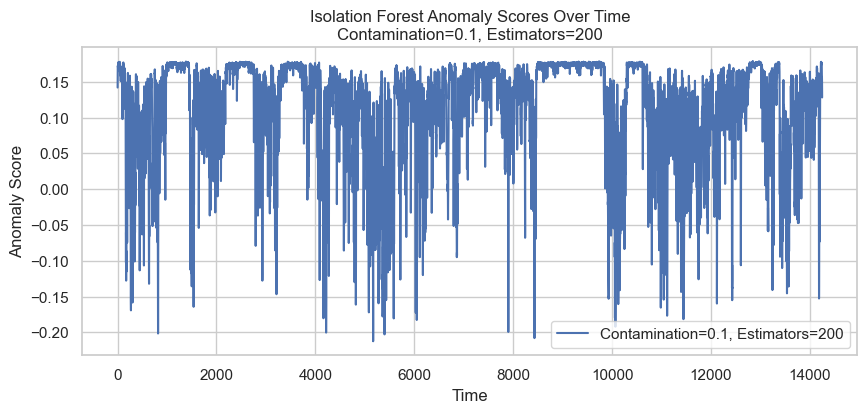

Summary of Anomalies Detected for Different Parameter Combinations:
   Contamination Rate  Number of Estimators  Number of Anomalies Detected
0                0.01                    50                           143
1                0.01                   100                           143
2                0.01                   200                           143
3                0.05                    50                           713
4                0.05                   100                           713
5                0.05                   200                           713
6                0.10                    50                          1425
7                0.10                   100                          1425
8                0.10                   200                          1425


In [104]:
# Run the model and get results for each combination of parameters
results_df = isolation_forest_with_params(data, contamination_rates, estimator_counts)

# Display the summary of results
print("Summary of Anomalies Detected for Different Parameter Combinations:")
print(results_df)


In [107]:
# Group the results for enhanced clarity
grouped_results = results_df.pivot_table(index="Contamination Rate", columns="Number of Estimators", values="Number of Anomalies Detected")

# Display the grouped results for analysis
print("Grouped Results for Analysis:")
print(grouped_results)


Grouped Results for Analysis:
Number of Estimators     50      100     200
Contamination Rate                          
0.01                   143.0   143.0   143.0
0.05                   713.0   713.0   713.0
0.10                  1425.0  1425.0  1425.0
